In [44]:
pip install TensorRT

Note: you may need to restart the kernel to use updated packages.


In [45]:

from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [46]:
## DONE BY MARIEM ##

base_model = keras.applications.VGG16(
    weights="imagenet",
    input_shape=(112, 112, 3),
    include_top=False)

In [47]:
# Freeze base model
base_model.trainable = False


In [48]:

# Create inputs with correct shape
inputs = base_model.input

x = base_model(inputs, training=False)

In [49]:
# Add pooling layer or flatten layer
x = Flatten()(x)


In [54]:
# Add final dense layer
# there are 6, three fresh fruit 3 rotten
outputs = keras.layers.Dense(14, activation = 'softmax')(x)


In [55]:
# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

model.summary()

model.compile(loss = "categorical_crossentropy" , metrics =['acc'])

datagen = ImageDataGenerator(rescale=1./255,)

directory = "/home/hk/Downloads/down/dataset"

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 112, 112, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 14)             │        64,526 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,779,214 (56.38 MB)

 Trainable params: 64,526 (252.05 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [56]:
print(f"Training classes: {train_it.num_classes}")
print(f"Testing classes: {test_it.num_classes}")


Training classes: 14
Testing classes: 14


In [57]:
# Remove 'directory +' if you are specifying the full path
train_it = datagen.flow_from_directory("/home/hk/Downloads/down/dataset/Train",
                                       target_size=(112, 112),
                                       color_mode='rgb',
                                       class_mode="categorical",
                                       )

# load and iterate test dataset
test_it = datagen.flow_from_directory("/home/hk/Downloads/down/dataset/Test",
                                      target_size=(112, 112),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      )

# Train the model
history = model.fit(train_it,
                    validation_data=test_it,
                    steps_per_epoch=train_it.samples // train_it.batch_size,
                    validation_steps=test_it.samples // test_it.batch_size,
                    epochs=6)
print(f"Number of classes: {train_it.num_classes}")




Found 21044 images belonging to 14 classes.
Found 6738 images belonging to 14 classes.
Epoch 1/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 428s 651ms/step - acc: 0.7482 - loss: 0.7343 - val_acc: 0.9124 - val_loss: 0.2506
Epoch 2/6
  1/657 ━━━━━━━━━━━━━━━━━━━━ 5:29 502ms/step - acc: 0.9062 - loss: 0.2269

2024-10-18 12:57:08.745413: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/hk/.config/jupyterlab-desktop/jlab_server/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - acc: 0.9062 - loss: 0.2269 - val_acc: 0.8889 - val_loss: 0.2249
Epoch 3/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 434s 661ms/step - acc: 0.9281 - loss: 0.2096 - val_acc: 0.9379 - val_loss: 0.1899
Epoch 4/6
  1/657 ━━━━━━━━━━━━━━━━━━━━ 5:27 499ms/step - acc: 0.9062 - loss: 0.2341

2024-10-18 13:04:23.478756: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - acc: 0.9062 - loss: 0.2341 - val_acc: 1.0000 - val_loss: 0.0292
Epoch 5/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 436s 663ms/step - acc: 0.9493 - loss: 0.1475 - val_acc: 0.9458 - val_loss: 0.1549
Epoch 6/6
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - acc: 1.0000 - loss: 0.0537 - val_acc: 0.8889 - val_loss: 0.4345
Number of classes: 14


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])
dict_values([[0.8443270325660706, 0.90625, 0.9302303194999695, 0.90625, 0.9501237273216248, 1.0], [0.4496825337409973, 0.2269493043422699, 0.1996145397424698, 0.2341027706861496, 0.14473611116409302, 0.05369015783071518], [0.9123511910438538, 0.8888888955116272, 0.9379464387893677, 1.0, 0.9458333253860474, 0.8888888955116272], [0.25061580538749695, 0.22486914694309235, 0.18993760645389557, 0.02919246070086956, 0.15489211678504944, 0.43446865677833557]])
[0.8443270325660706, 0.90625, 0.9302303194999695, 0.90625, 0.9501237273216248, 1.0]
[0.9123511910438538, 0.8888888955116272, 0.9379464387893677, 1.0, 0.9458333253860474, 0.8888888955116272]
{'acc': [0.8443270325660706, 0.90625, 0.9302303194999695, 0.90625, 0.9501237273216248, 1.0], 'loss': [0.4496825337409973, 0.2269493043422699, 0.1996145397424698, 0.2341027706861496, 0.14473611116409302, 0.05369015783071518], 'val_acc': [0.9123511910438538, 0.8888888955116272, 0.9379464387893677, 1.0, 

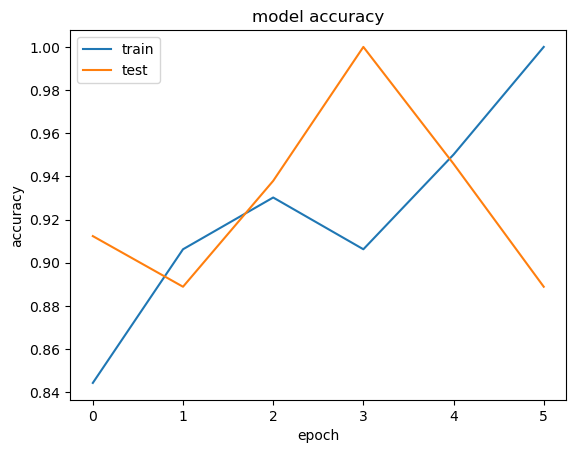

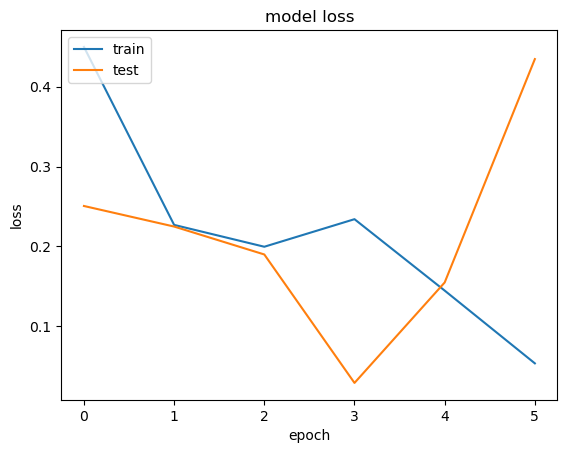

done fitting
DONE


In [60]:
# list all data in history
print(history.history.keys())
print(history.history.values())
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("done fitting")

model.save_weights('cnnFruitTry3.weights.h5')
print("DONE")


In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the prediction function
def predict_image(img_path, model):
    # Load the image with the target size (112, 112)
    img = image.load_img(img_path, target_size=(112, 112))
    
    # Convert the image to an array
    img_array = image.img_to_array(img)
    
    # Rescale the image to match the training preprocessing (rescale by 1./255)
    img_array = img_array / 255.0
    
    # Expand dimensions to make it batch size 1 (since the model expects batches)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class probabilities
    predictions = model.predict(img_array)
    
    # Get the index of the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    
    # Optionally, map the class index to class names
    class_indices = train_it.class_indices
    # Reverse the mapping
    class_labels = {v: k for k, v in class_indices.items()}
    
    # Get the label of the predicted class
    predicted_label = class_labels[predicted_class[0]]
    
    # Return the predicted label
    return predicted_label

# Example usage
img_path = "/home/hk/Downloads/down/Fruit Ripeness Detection.v1-fruit-ripeness-detection-dataset.yolov11/test/images/img593_png.rf.5231934fd4c4ecb167c0a7cdeaa64624.jpg"
predicted_label = predict_image(img_path, model)
print(f"Predicted label: {predicted_label}")


2024-10-18 16:04:28.261170: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 16:04:28.505664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 16:04:28.605418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 16:04:28.631527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 16:04:28.803736: I tensorflow/core/platform/cpu_feature_guar

NameError: name 'model' is not defined

In [68]:
# Save the entire model
model.save('cnnFruitModel.h5')
